In [0]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
y_test.shape

(10000,)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0


Calculation of the number of Parameters in model.summary()
```
For Convolutional Layers:
num_parameters == output_channels[input_channels*[window_size]+1]

For Dense Layers:
num_parameters == output_size[input_size +1]
```



In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 167us/sample - loss: 2.2804 - acc: 0.1550 - val_loss: 2.2406 - val_acc: 0.3456
Epoch 2/12
60000/60000 [==============================] - 7s 118us/sample - loss: 2.2163 - acc: 0.2591 - val_loss: 2.1626 - val_acc: 0.4585
Epoch 3/12
60000/60000 [==============================] - 7s 118us/sample - loss: 2.1358 - acc: 0.3521 - val_loss: 2.0606 - val_acc: 0.5872
Epoch 4/12
60000/60000 [==============================] - 7s 118us/sample - loss: 2.0286 - acc: 0.4304 - val_loss: 1.9253 - val_acc: 0.6634
Epoch 5/12
60000/60000 [==============================] - 7s 119us/sample - loss: 1.8949 - acc: 0.4974 - val_loss: 1.7567 - val_acc: 0.7110
Epoch 6/12
60000/60000 [==============================] - 7s 118us/sample - loss: 1.7369 - acc: 0.5518 - val_loss: 1.5630 - val_acc: 0.7384
Epoch 7/12
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5655 - acc: 0.5962 - val_

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7311880114555359
Test accuracy: 0.8383


In [0]:
loan=x_test[47].reshape(1,28,28,1)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

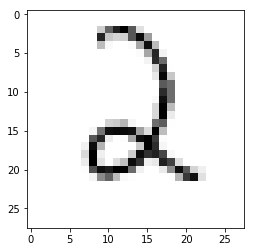

In [0]:
plt.imshow(x_test[47].reshape(28,28), cmap='Greys')

In [0]:
loan=model.predict(loan)

In [0]:
print(loan)

[[0.01650864 0.04580241 0.6314634  0.04040972 0.04779216 0.01647572
  0.11731394 0.00858737 0.04626977 0.02937691]]


In [0]:
import numpy as np
np.argmax(loan)

2